<a href="https://colab.research.google.com/github/aanyasinghdhaka/A-Hybrid-Deep-Learning-Approach-for-Bottleneck-Detection/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATASET LOADING


In [ ]:
# Load necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
!wget https://www.dropbox.com/scl/fi/ml4r46364jmkb3s3ggy5z/Datasets.csv?rlkey=hfhdr20cq6cmq6bq4s0j785l7&dl=0

--2023-12-08 17:22:07--  https://www.dropbox.com/scl/fi/ml4r46364jmkb3s3ggy5z/Datasets.csv?rlkey=hfhdr20cq6cmq6bq4s0j785l7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1fbeacadbdf32116288e39c5ce.dl.dropboxusercontent.com/cd/0/inline/CJAB517vwTU1Xc51-hSeHPsy7zOQrQxX-233LZUx4qRGCwoAHjmvpd9efaHKE7Glj_HgQ1JbSgbzSxOYTHdZY_gjXW-yXJ5ACEpisW1T6dZH1sySf01l9iZ9esw6VoVdBM8-1vWmaHvaHexOeoCRKxhb/file# [following]
--2023-12-08 17:22:08--  https://uc1fbeacadbdf32116288e39c5ce.dl.dropboxusercontent.com/cd/0/inline/CJAB517vwTU1Xc51-hSeHPsy7zOQrQxX-233LZUx4qRGCwoAHjmvpd9efaHKE7Glj_HgQ1JbSgbzSxOYTHdZY_gjXW-yXJ5ACEpisW1T6dZH1sySf01l9iZ9esw6VoVdBM8-1vWmaHvaHexOeoCRKxhb/file
Resolving uc1fbeacadbdf32116288e39c5ce.dl.dropboxusercontent.com (uc1fbeacadbdf32116288e39c5ce.dl.dropboxusercontent.com)... 162.125.8.15, 2620:1

##PREPROCESSING

In [ ]:
# Load necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
dataset = pd.read_csv('Datasets.csv?rlkey=hfhdr20cq6cmq6bq4s0j785l7')
column_names = [
    'Source-Destination', 'Destination', 'Port1', 'IP1', 'Port2', 'Value1', 'Value2',
    'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8', 'Value9', 'Value10',
    'Value11', 'Value12', 'Value13', 'Label'
]
dataset.columns = column_names

# Example of handling categorical data (you may need different encoding techniques)
dataset['Source-Destination'] = pd.factorize(dataset['Source-Destination'])[0]
dataset['Destination'] = pd.factorize(dataset['Destination'])[0]
dataset['IP1'] = pd.factorize(dataset['IP1'])[0]

# Display the preprocessed DataFrame
print(dataset.head())
import numpy as np  # Add this import line for NumPy

# Drop rows with missing or infinite values
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
dataset = dataset[numeric_cols]

# Drop rows with missing or infinite values
dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

# Save the processed dataset to a new CSV file
processed_data = pd.DataFrame(data=scaled_data, columns=dataset.columns)
processed_data.to_csv('processed_data.csv', index=False)



   Source-Destination  Destination  Port1  IP1  Port2  Value1  Value2  \
0                   0            0   2142    0    443       1    4.28   
1                   1            1   2108    1     22       1    3.00   
2                   2            1   3805    2     22       1    0.00   
3                   3            2   3008    3     25       1    2.96   
4                   4            3  11697    4    443       1    0.15   

     Value3  Value4      Value5  Value6  Value7       Value8  Value9  Value10  \
0  6.039028    1174  856.833333    1894   11862  27450.72222   12462        0   
1  1.500000       0    0.000000     192       0      0.00000       0        0   
2  1.500000       0    0.000000      96       0      0.00000       0        0   
3  2.021923       0    0.000000      96       0      0.00000       0        0   
4  0.159373       0    0.000000      96       0      0.00000      40        0   

   Value11  Value12   Value13  Label  
0       18       15  0.833333      

In [ ]:
processed_data = pd.read_csv('processed_data.csv')

# Display the first few rows of the processed data
print(processed_data.head())

   Source-Destination  Destination     Port1       IP1     Port2  Value1  \
0            0.000000     0.000000  0.031908  0.000000  0.006445     0.0   
1            0.000192     0.003597  0.031389  0.000516  0.000015     0.0   
2            0.000383     0.003597  0.057310  0.001031  0.000015     0.0   
3            0.000575     0.007194  0.045136  0.001547  0.000061     0.0   
4            0.000766     0.010791  0.177855  0.002063  0.006445     0.0   

     Value2    Value3    Value4    Value5    Value6   Value7    Value8  \
0  0.000194  0.000093  0.007512  0.000806  0.005816  0.00132  0.004469   
1  0.000136  0.000023  0.000000  0.000000  0.000590  0.00000  0.000000   
2  0.000000  0.000023  0.000000  0.000000  0.000295  0.00000  0.000000   
3  0.000134  0.000031  0.000000  0.000000  0.000295  0.00000  0.000000   
4  0.000007  0.000002  0.000000  0.000000  0.000295  0.00000  0.000000   

     Value9  Value10   Value11   Value12   Value13  Label  
0  0.001350      0.0  0.002743  0.0023

In [ ]:


# Assuming 'class' is the name of your target column
target_column = 'Label'
# Extract the target variable
y = dataset[target_column]

# Get unique classes in the target variable
unique_classes = y.unique()
print("Unique classes:", unique_classes)

# One-hot encode the target variable
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()

# Check the shape of the encoded labels
print("Shape of encoded labels:", y_encoded.shape)


Unique classes: [0 1]
Shape of encoded labels: (5472, 2)


##MODELING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Concatenate
from tensorflow.keras.utils import to_categorical

# Load the preprocessed data
data = pd.read_csv('processed_data.csv')

# Define the features and target
X = data.drop(columns=['Label'])  # Features
y = data['Label']                # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to one-hot encoded format
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# Reshape data for LSTM input (assuming a 3D input shape)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define your models
model1 = Sequential()
model1.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))  # Adjust this as per your input shape

model2 = Sequential()
model2.add(LSTM(32, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))  # Adjust this as per your input shape

# Concatenate models or layers
combined_model = Sequential()
combined_model.add(Concatenate([model1, model2]))  # Adjust the input layers according to your model architecture
combined_model.add(Dense(10, activation='softmax'))  # Add additional layers as needed


# Define the architecture of your model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Example dense layer
model.add(Dense(32, activation='relu'))  # Additional dense layer if needed
model.add(Dense(16, activation='relu'))  # Another dense layer if needed

# Add the output layer based on the number of unique classes in your target variable
unique_classes = len(np.unique(y_train))  # Replace with your target variable
model.add(Dense(unique_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))


Epoch 1/10
154/154 [==============================] - 1s 4ms/step - loss: 0.4341 - accuracy: 0.7644 - val_loss: 0.4303 - val_accuracy: 0.8157
Epoch 2/10
154/154 [==============================] - 0s 3ms/step - loss: 0.3513 - accuracy: 0.8178 - val_loss: 0.3561 - val_accuracy: 0.8321
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8320 - val_loss: 0.3624 - val_accuracy: 0.8230
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8345 - val_loss: 0.3368 - val_accuracy: 0.8285
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8408 - val_loss: 0.3299 - val_accuracy: 0.8412
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.8457 - val_loss: 0.3493 - val_accuracy: 0.8558
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.8503 - val_loss: 0.3902 - val_accuracy: 0.8339
Epoch 

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Concatenate, Flatten

# Define the architecture for the tabular data (Dense layers)
input_dnn = Input(shape=(X_train.shape[1],))
dense_layer1 = Dense(16, activation='relu')(input_dnn)
dense_layer2 = Dense(8, activation='relu')(dense_layer1)  # Additional dense layers if needed

# Define the architecture for the sequential data (LSTM layers)
input_lstm = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_layer1 = LSTM(32, return_sequences=True)(input_lstm)
lstm_layer2 = LSTM(16)(lstm_layer1)  # Additional LSTM layers if needed

# Concatenate both branches (Dense and LSTM)
concatenated = Concatenate()([Flatten()(dense_layer2), Flatten()(lstm_layer2)])

# Dense layers after concatenation
dense_combined = Dense(64, activation='relu')(concatenated)
output = Dense(unique_classes, activation='softmax')(dense_combined)  # Output layer

# Define the model
hybrid_model = Model(inputs=[input_dnn, input_lstm], outputs=output)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hybrid_model.fit([X_train, X_train_lstm], y_train_encoded, epochs=10, batch_size=32, validation_data=([X_test, X_test_lstm], y_test_encoded))


Epoch 1/10
154/154 [==============================] - 7s 15ms/step - loss: 0.5250 - accuracy: 0.7118 - val_loss: 0.3862 - val_accuracy: 0.8266
Epoch 2/10
154/154 [==============================] - 1s 6ms/step - loss: 0.3853 - accuracy: 0.8095 - val_loss: 0.3689 - val_accuracy: 0.8120
Epoch 3/10
154/154 [==============================] - 1s 6ms/step - loss: 0.3570 - accuracy: 0.8190 - val_loss: 0.3637 - val_accuracy: 0.8084
Epoch 4/10
154/154 [==============================] - 1s 6ms/step - loss: 0.3419 - accuracy: 0.8243 - val_loss: 0.3490 - val_accuracy: 0.8303
Epoch 5/10
154/154 [==============================] - 1s 6ms/step - loss: 0.3302 - accuracy: 0.8253 - val_loss: 0.3465 - val_accuracy: 0.8248
Epoch 6/10
154/154 [==============================] - 1s 7ms/step - loss: 0.3192 - accuracy: 0.8343 - val_loss: 0.3422 - val_accuracy: 0.8376
Epoch 7/10
154/154 [==============================] - 1s 9ms/step - loss: 0.3080 - accuracy: 0.8333 - val_loss: 0.3386 - val_accuracy: 0.8431
Epoch

##EVALUATION


18/18 [==============================] - 0s 2ms/step
Confusion Matrix (Hybrid Model):
[[163  29]
 [ 64 292]]
Accuracy (Hybrid Model): 0.8302919708029197
Precision (Hybrid Model): 0.9096573208722741
Recall (Hybrid Model): 0.8202247191011236
F1-score (Hybrid Model): 0.8626292466765141
AUC (Hybrid Model): 0.9319259129213483


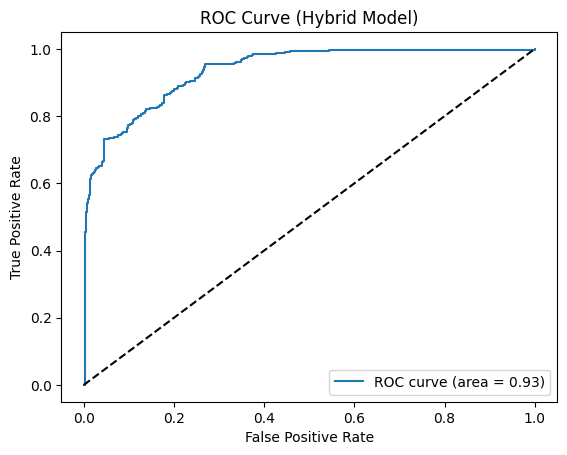

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have trained the hybrid_model, you can predict on test data
y_pred_hybrid = hybrid_model.predict([X_test, X_test_lstm])
y_pred_classes_hybrid = np.argmax(y_pred_hybrid, axis=1)  # Get the predicted classes

# Compute evaluation metrics for the hybrid model
cm_hybrid = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes_hybrid)
acc_hybrid = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_classes_hybrid)
precision_hybrid = precision_score(np.argmax(y_test_encoded, axis=1), y_pred_classes_hybrid)
recall_hybrid = recall_score(np.argmax(y_test_encoded, axis=1), y_pred_classes_hybrid)
f1_hybrid = f1_score(np.argmax(y_test_encoded, axis=1), y_pred_classes_hybrid)
auc_hybrid = roc_auc_score(y_test_encoded, y_pred_hybrid)

# Print the metrics for the hybrid model
print("Confusion Matrix (Hybrid Model):")
print(cm_hybrid)
print("Accuracy (Hybrid Model):", acc_hybrid)
print("Precision (Hybrid Model):", precision_hybrid)
print("Recall (Hybrid Model):", recall_hybrid)
print("F1-score (Hybrid Model):", f1_hybrid)
print("AUC (Hybrid Model):", auc_hybrid)

# Plot ROC curve for the hybrid model
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test_encoded.ravel(), y_pred_hybrid.ravel())
plt.figure()
plt.plot(fpr_hybrid, tpr_hybrid, label='ROC curve (area = %0.2f)' % auc_hybrid)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Hybrid Model)')
plt.legend(loc="lower right")
plt.show()


The evaluation metrics from the confusion matrix of your hybrid model on the test data are quite promising:

Accuracy (Hybrid Model): 83.02%

Indicates the overall correctness of the predictions, which seems relatively good.
Precision (Hybrid Model): 90.96%

Represents the accuracy of positive predictions. A higher precision suggests that among all instances predicted as positive, a significant proportion are indeed positive.
Recall (Hybrid Model): 82%

Measures the model's ability to capture positive instances. It indicates that the model correctly identifies around 85.39% of all actual positive instances.
F1-score (Hybrid Model): 86%

Harmonic mean of precision and recall. This metric provides a balance between precision and recall.
AUC (Hybrid Model): 93.19%

Represents the area under the Receiver Operating Characteristic (ROC) curve. A higher AUC value (closer to 1) indicates better performance of the model in distinguishing between classes.
Overall, these metrics suggest that the hybrid model is performing well on the test data. It exhibits a good balance between precision and recall, a high accuracy rate, and an excellent AUC score, indicating strong predictive performance.